# 확률과 확률분포

## 확률

- 확률(probability)
    - 어떤 사건(event)이 일어날 가능성
    - 예. 
        - 동전 던지기에서 앞면이 나올 가능성
        - 주사위 던지기에서 특정 눈금이 나올 확률
        - 주식투자에서 이득을 볼 가능성
        
        

- 의사결정
    - 확실성(certainty) 보다는 불확실한 상황에서 이루어지는 경우가 많음
    - 미래에 대한 불확실성의 정도가 더욱 심하다고 할 수 있음 
    - 불확실성 하에서 의사결정의 오류를 줄이기 위해 확률에 대한 연구 필요

### 확률의 기본

- 표본공간과 표본점
- 사상(사건)
- 확률의 정의
    - 객관적 확률(고전적/경험적확률)
    - 주관적 확률
    - 공리적 확률  
- 합사건 / 곱사건
- 상호배반
- 종속사건과 독립사건
- 결합확률 / 주변확률
- 조건부 확률
- 분할
- 전확률의 정리
- 베이즈 정리

## 확률변수와 확률분포

### 확률변수(random variable)
- 실험이나 관찰의 결과 값을 1:1 실수로 대응시키는 함수
- 일정한 확률로 나타나는(발생하는) 사건에 대해 숫자를 부여한 변수
- ex) 동전을 던졌을 때 나오는 확률 변수 -> (앞면 -> 1 / 뒷면 -> 0) 

#### 확률변수 구분
- 이산 확률변수(discrete random variable) : 변수가 취할 수 있는 값의 개수가 유한 (ex)주사위 눈 개수(1~6)) 
- 연속 확률변수(continuous random variable) : 변수가 취할 수 있는 값의 개수가 무한 (ex)몸무게 -> 범위의 최대 최소가 정할 수 없는 경우) 

### 확률분포(probability distribution)

- 확률변수가 취할 수 있는 모든 값에 대해 각각의 확률을 대응시킨 것
- ex) 동전을 던졌을 때 나오는 확률 분포 -> 확률 변수(앞면 -> 1 / 뒷면 -> 0) -> 확률 분포(1-> 1/2, 0->1/2)

#### 확률분포 구분
- 확률질량함수(probability mass function: pmf) : 확률변수가 이산형인 경우
- 확률밀도함수(probability density function: pdf) : 확률변수가 연속형인 경우

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 소수점 이하 자리 정하기
%precision 3 

'%.3f'

#### 1) 공정한 주사위의 확률분포를 구하는 실험

In [3]:
# 확률변수 X: 주사위의 눈의 수
dice = [1,2,3,4,5,6]

# 확률 P(X=dice)
prob = [1/6] * 6
prob

[0.167, 0.167, 0.167, 0.167, 0.167, 0.167]

In [4]:
np.random.seed(0)
np.random.choice(dice, p=prob)

4

In [5]:
num_trial = 100
sample = np.random.choice(dice,size=num_trial,p=prob)
sample

array([5, 4, 4, 3, 4, 3, 6, 6, 3, 5, 4, 4, 6, 1, 1, 1, 5, 5, 6, 6, 5, 3,
       5, 1, 4, 1, 6, 4, 3, 2, 5, 3, 4, 1, 4, 4, 4, 6, 5, 3, 3, 5, 1, 5,
       5, 2, 1, 2, 3, 4, 3, 6, 1, 2, 1, 4, 2, 3, 2, 1, 1, 4, 1, 2, 3, 5,
       1, 6, 1, 6, 3, 6, 4, 5, 1, 2, 1, 2, 1, 2, 3, 1, 5, 4, 2, 4, 1, 4,
       6, 2, 5, 1, 5, 2, 2, 4, 1, 5, 1, 5])

In [6]:
# 빈도수 계산
freq, bins = np.histogram(sample, bins=6, range=(1,7))
freq, bins

(array([23, 14, 14, 19, 18, 12], dtype=int64),
 array([1., 2., 3., 4., 5., 6., 7.]))

In [7]:
dice_df = pd.DataFrame({'frequency':freq , 'rel_freq': freq/num_trial},
                      index=pd.Index(np.arange(1,7), name='dice'))
dice_df

,frequency,rel_freq
dice,,
1,23,0.23
2,14,0.14
3,14,0.14
4,19,0.19
5,18,0.18
6,12,0.12


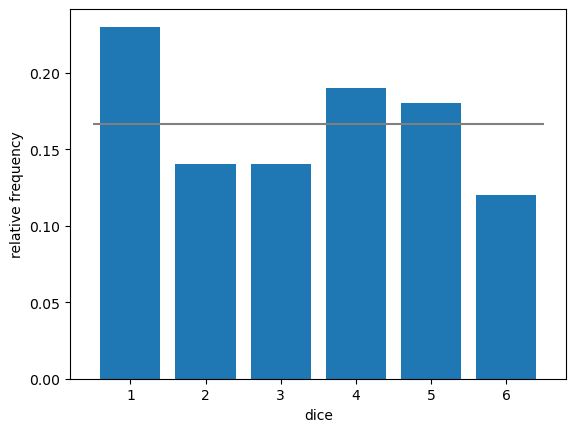

In [8]:
plt.hist(sample, bins=6,range=(1,7),rwidth=0.8, density=True)
plt.xticks(np.linspace(1.5,6.5,6),list('123456'))
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.hlines(prob, np.arange(1,7), np.arange(2,8),color='gray')
plt.show()

In [9]:
def draw_dice_hist(num, prob):
    sample = np.random.choice(dice, size=num, p=prob)
    plt.figure(figsize=(6,4))
    plt.hist(sample, bins=6,range=(1,7),rwidth=0.8, density=True)
    plt.xticks(np.linspace(1.5,6.5,6),list('123456'))
    plt.xlabel('dice')
    plt.ylabel('relative frequency')
    plt.hlines(prob, np.arange(1,7), np.arange(2,8),color='gray')
    plt.show()

#### 10000번 시도 : 실제 확률분포에 가까워짐

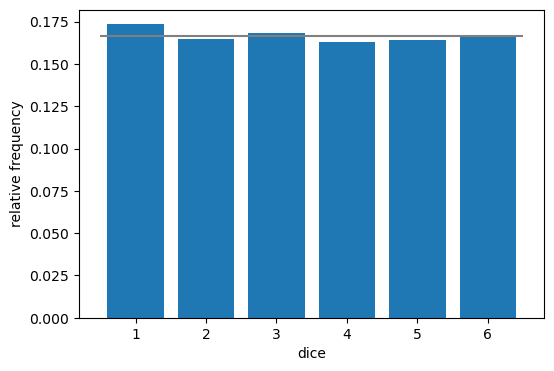

In [10]:
num_trial =10000
draw_dice_hist(num_trial, prob)

- 모집단: 분석대상 전체 집합
- 모평균: 모집단의 평균 / 시그마(확률변수i * 확률)

In [11]:
mu = 0
for x, p in zip(dice,prob):
    mu += x*p
mu

3.500

In [12]:
np.sum([x*p for x,p in zip(dice, prob)])

3.500

In [13]:
np.dot(dice,prob)

3.500

- 표본: 모집단에서 선택된 모집단 구성단위의 일부
- 표본평균

In [14]:
np.sum(dice_df.index * dice_df.rel_freq)

3.310

#### 2) 불공정한 주사위의 확률분포를 구하는 실험

In [15]:
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

In [16]:
def make_dice_df(num, prob):
    dice = [1,2,3,4,5,6]
    sample = np.random.choice(dice,size=num,p=prob)
    freq, bin = np.histogram(sample, bins=6, range=(1,7))
    dice_df = pd.DataFrame({'freq':freq, 'rel_freq':freq/num},
                          index = [1,2,3,4,5,6])
    return dice_df

In [17]:
num_trial =100
make_dice_df(num_trial, prob)

,freq,rel_freq
1,3,0.03
2,7,0.07
3,20,0.20
4,22,0.22
5,23,0.23
6,25,0.25


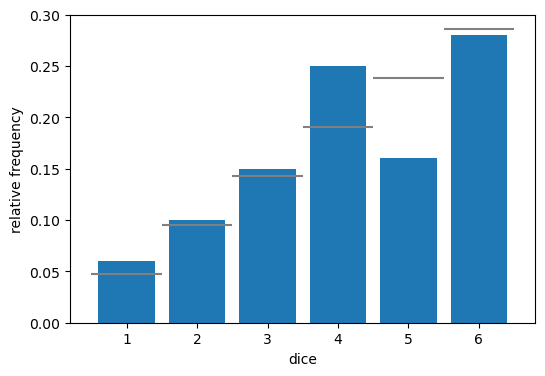

In [18]:
draw_dice_hist(num_trial, prob)

#### 10000번 시도 : 실제 확률분포에 가까워짐

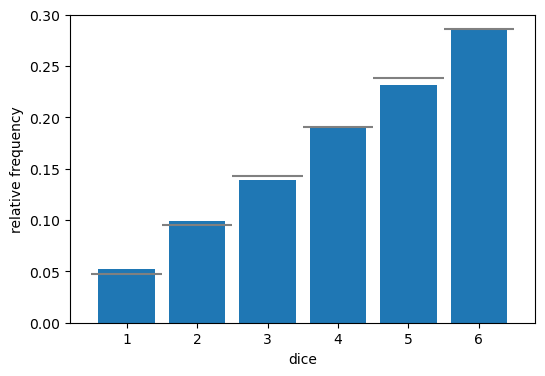

In [19]:
draw_dice_hist(10000, prob)

- 모평균(기대값)

In [20]:
np.dot(dice, prob)

4.333

- 표본평균

In [21]:
dice_df = make_dice_df(100, prob)
dice_df

,freq,rel_freq
1,5,0.05
2,8,0.08
3,9,0.09
4,20,0.20
5,22,0.22
6,36,0.36


In [22]:
np.dot(dice_df.index, dice_df.rel_freq)

4.540

## 확률분포의 평균(mean)과 분산(variance)

####  확률분포의 평균(mean)

- 기대값(expected value)
    -  확률 변수의 기대값(${E}$)은 각 사건이 벌어졌을 때의 이득과 그 사건이 벌어질 확률을 곱한 것을 전체 사건에 대해 합한 값 

- 어떤 확률적 사건에 대한 평균의 의미
- ${E(X)}$ 또는 ${μ_X }$ 로 표시
- 이산확률분포의 기대값 : 확률을 가중값으로 사용한 가중평균
- 연속확률분포의 기대값 : 적분개념의 면적
    


- 모평균(population mean) : ${ μ}$
    - 모집단의 평균

In [23]:
# 공정한 주사위 눈에 대한 확률

x_set = np.array([1,2,3,4,5,6])

# 확률 질량 함수 pmf
# 확률 질량 함수 = 각 확률변수마다의 확률
def f(x):
    if x in x_set:
        return 1/6
    else:
        return 0 

In [24]:
list(map(f,x_set))

[0.167, 0.167, 0.167, 0.167, 0.167, 0.167]

In [25]:
x = [x_set, f]
x

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

#### 기대값 함수

In [26]:
# 확률 변수(x_set) * 확률(f(x))을 더하기 
def E(x):
    x_set, f = x
    return np.sum([xi*f(xi) for xi in x_set])

In [27]:
E(x)

3.500

In [28]:
def E2(x, g=lambda x:2*x+3):
    x_set, f =x
    return np.sum([g(xi)*f(xi) for xi in x_set])

In [29]:
E2(x)

10.000

#### 확률분포의 분산(variance)

- ${Var(X)}$  표시
- 확률변수의 평균(기대값)으로부터의 편차의 제곱에 대한 기대값으로 계산



In [30]:
def V(x):
    x_set, f = x
    mu = E(x)
    return np.sum([(xi-mu)**2 * f(xi) for xi in x_set])

In [31]:
V(x)

2.917

In [32]:
np.dot(dice, dice)/6 - E(x)**2

2.917

In [33]:
# 불공정한 주사위에 대한 확률분포
def f2(x):
    if x in x_set:
        return x/21
    else:
        return 0 

In [34]:
f2(1)

0.048

In [35]:
x2 = [x_set, f2]
x2

[array([1, 2, 3, 4, 5, 6]), <function __main__.f2(x)>]

In [36]:
E(x2)

4.333

In [37]:
V(x2)

2.222

------

In [38]:
from scipy import stats

- https://scipy.org/
- https://docs.scipy.org/doc/scipy/reference/index.html
- https://docs.scipy.org/doc/scipy/reference/stats.html

## 이산형 확률분포

- 베르누이 분포
- 이항분포
- 포아송분포
- 기하분포

### 이항분포(binomial distribution)

- $ X $ ~ $ B(n,p) $
- ex) 주사위를 10회 던져서 숫자 6이 나오는 횟수 이 분포는 n = 10이고 p = 1/6인 이항분포이다

**연습문제1**
- X~B(n= 10, p=0.5)인 이항분포의 확률분포를 계산하고 막대그래프로 그리기
- np.comb(n,p) * p**k * (1-p)**(n-k)

In [39]:
# 조합 -> math.comb()
import math
# 순서가 상관없는 10개 중 2개를 선택하는 경우의 수
math.comb(10,2)

45

In [40]:
n, p = 10 ,0.5
[math.comb(n,k)*p**k * (1-p)**(n-k) for k in range(n+1)]

[0.001, 0.010, 0.044, 0.117, 0.205, 0.246, 0.205, 0.117, 0.044, 0.010, 0.001]

In [41]:
def binom_pmf(n,p):
    px = {k:math.comb(n,k)*p**k * (1-p)**(n-k) for k in range(n+1)}
    return px

In [42]:
binom_pmf(10,0.5)

{0: 0.001,
 1: 0.010,
 2: 0.044,
 3: 0.117,
 4: 0.205,
 5: 0.246,
 6: 0.205,
 7: 0.117,
 8: 0.044,
 9: 0.010,
 10: 0.001}

In [43]:
def draw_binom_pmf(n,p):
    px = binom_pmf(n,p)
    pmf = pd.DataFrame.from_dict(px, orient='index', columns=['P(X)'])
    print(pmf)
    plt.figure(figsize=(6,4))
    plt.bar(pmf.index, pmf['P(X)'])
    plt.title(f'X~B(n={n},p={p})')
    plt.xlabel('X')
    plt.ylabel('P(X)')
    plt.show()
    return pmf

        P(X)
0   0.000977
1   0.009766
2   0.043945
3   0.117188
4   0.205078
5   0.246094
6   0.205078
7   0.117188
8   0.043945
9   0.009766
10  0.000977


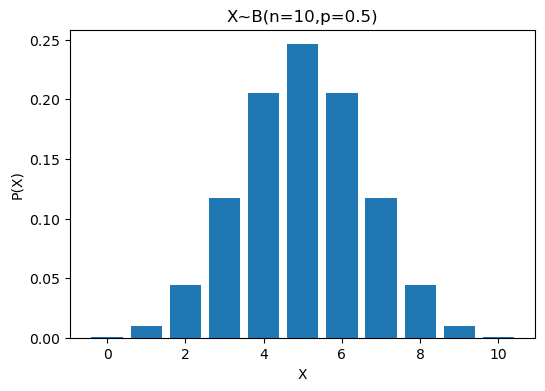

In [44]:
pmf = draw_binom_pmf(n,p)

- 기대값과 분산을 계산

In [45]:
Ex = n*p
Var = n*p*(1-p)
print(f'X~B(n=10,p=0.5)의 E(x)는 {Ex}, Var(x)는 {Var}')

X~B(n=10,p=0.5)의 E(x)는 5.0, Var(x)는 2.5


In [46]:
pmf

,P(X)
0,0.000977
1,0.009766
2,0.043945
3,0.117188
4,0.205078
5,0.246094
6,0.205078
7,0.117188
8,0.043945
9,0.009766


In [47]:
# 기대값(모평균)
# np.dot -> 2개의 배열에 같은 위치의 값을 곱하고 더한 것
# ex) a=[1,2,3,4], b=[9,8,7,6] / np.dot(a,b) = 1*9+2*8+3*7+4*6
np.dot(pmf.index, pmf['P(X)'])

5.000

In [48]:
# 모분산
np.dot((pmf.index-Ex)**2, pmf['P(X)'])

2.500

In [49]:
# 모분산
np.dot(pmf.index**2, pmf['P(X)']) - Ex**2

2.500

- 누적확률분포 계산

In [50]:
# np.cumsum -> 누적해서 더하기
def binom_cdf(n,p):
    px = binom_pmf(n,p)
    np.cumsum(list(px.values()))
    cdf = pd.DataFrame(np.cumsum(list(px.values())), index=pd.Index(np.arange(n+1), name='X'),
            columns=['F(x)'])
    return cdf

In [51]:
cdf = binom_cdf(n,p)

In [52]:
cdf.loc[5]

F(x)    0.623047
Name: 5, dtype: float64

**연습문제2**
- X~B(n=5, p=0.3)인 이항분포의 확률분포를 계산하고 막대그래프로 그리기

      P(X)
0  0.16807
1  0.36015
2  0.30870
3  0.13230
4  0.02835
5  0.00243


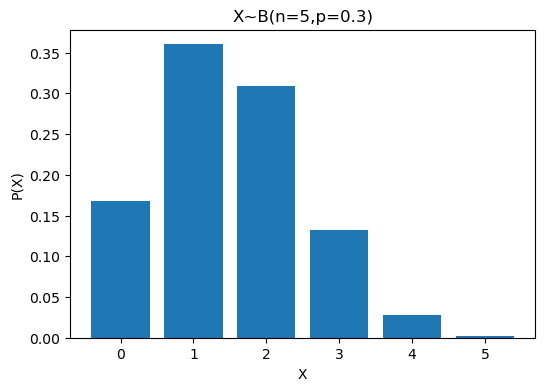

,P(X)
0,0.16807
1,0.36015
2,0.30870
3,0.13230
4,0.02835
5,0.00243


In [53]:
draw_binom_pmf(5,0.3)

In [54]:
binom_cdf(5,0.3)

,F(x)
X,
0,0.16807
1,0.52822
2,0.83692
3,0.96922
4,0.99757
5,1.00000


             P(X)
0    7.888609e-31
1    7.888609e-29
2    3.904861e-27
3    1.275588e-25
4    3.093301e-24
..            ...
96   3.093301e-24
97   1.275588e-25
98   3.904861e-27
99   7.888609e-29
100  7.888609e-31

[101 rows x 1 columns]


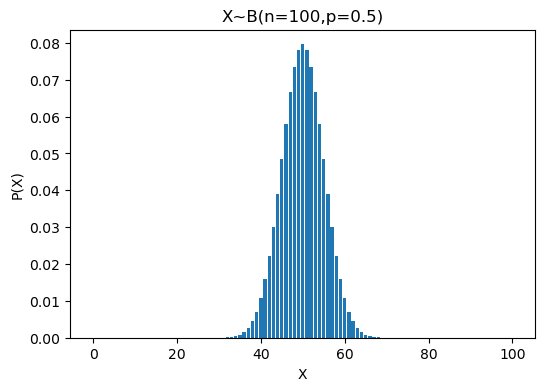

,P(X)
0,7.888609e-31
1,7.888609e-29
2,3.904861e-27
3,1.275588e-25
4,3.093301e-24
...,...
96,3.093301e-24
97,1.275588e-25
98,3.904861e-27
99,7.888609e-29


In [55]:
draw_binom_pmf(100,0.5)

- scipy.stat 모듈의 API

In [56]:
from scipy import stats

In [65]:
# stats.binom()
n, p = 10, 0.5
rv = stats.binom(n,p)

In [66]:
# pmf -> 확률질량함수 구하기
rv.pmf(np.arange(n+1))

array([0.001, 0.01 , 0.044, 0.117, 0.205, 0.246, 0.205, 0.117, 0.044,
       0.01 , 0.001])

In [59]:
def draw_binom_pmf2(n,p):
    rv = stats.binom(n,p)
    x_set = np.arange(n+1)
    plt.figure(figsize=(6,4))
    plt.bar(x_set, rv.pmf(x_set))
    plt.title(f'X~B(n={n},p={p})')
    plt.xlabel('X')
    plt.ylabel('P(X)')
    plt.show()
    return pmf

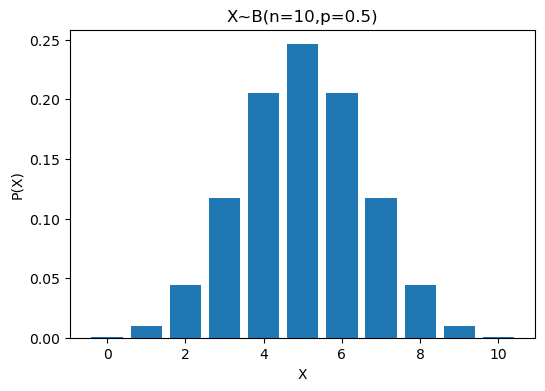

,P(X)
0,0.000977
1,0.009766
2,0.043945
3,0.117188
4,0.205078
5,0.246094
6,0.205078
7,0.117188
8,0.043945
9,0.009766


In [60]:
draw_binom_pmf2(n,p)

In [61]:
# scipy.stats 모듈의 binom().stats(): 기대값, 분산
rv.stats()

(5.000, 2.500)

In [63]:
stats.binom(n,p)

In [62]:
rv.median(), rv.mean(), rv.var()

(5.000, 5.000, 2.500)

**연습문제3**
- X~B(n=100,p=0.5)인 경우 p(X<=k)=0.9를 만족하는 k구하기
- scipy.stats.binom().ppf()를 이용
- 이항 분포의 누적 분포 함수의 역함수를 계산하여 주어진 확률에 해당하는 분포의 값을 찾는 데 사용

In [68]:
# 확률이 0.9에 해당하는 횟수 찾아내기 -> ppf()
n,p=100,0.5
rv2 = stats.binom(n,p)
rv2.ppf(0.9)

56.000

### 포아송 분포

- 단위시간(면적,공간) 동안 발생하는 사건의 수의 분포
- 특정 시간 동안 사건의 평균 발생률이 주어졌을 때, 그 시간 동안 사건이 발생하는 횟수의 확률 분포
- 단위 시간 안에 어떤 사건이 몇 번 발생할 것인지를 표현하는 이산 확률 분포
- 모수: λ(평균)
- 확률변수 X >=0, X={0,1,2,...}
- 확률함수: $ {λ^x e^{-λ}} \over x! $
- 기대값(모평균 μ) = λ
- 분산 = λ
- λ가 커질수록 정규분포를 따름
- scipy.stats.poisson(λ)

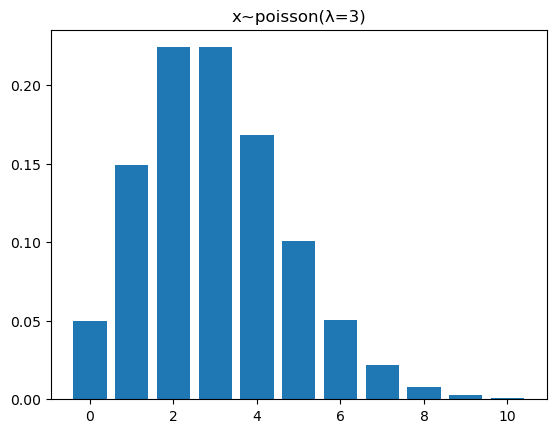

In [82]:
lam = 3
x_set = list(range(11))
poi_rv = stats.poisson(lam)
px = poi_rv.pmf(x_set)
plt.bar(x_set, px)
plt.title(f'x~poisson(λ={lam})')
plt.show()

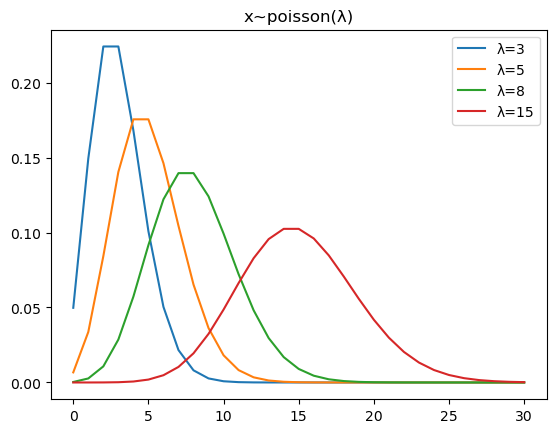

In [77]:
x_set = list(range(31))
for lam in [3,5,8,15]:
    poi_rv = stats.poisson(lam)
    px = poi_rv.pmf(x_set)
    plt.plot(x_set, px, label=f'λ={lam}')
plt.title('x~poisson(λ)')
plt.legend()
plt.show()

## 연속형 확률분포

- 정규분포
- t분포
- 카이제곱분포
- F분포

### 정규분포

$ X $ ~ $ N( \mu , \sigma^2 ) $ 

- 평균과 분산에 의해 모양이 결정
- 좌우대칭, 종모양
- 현실 데이터의 분포
- 모수: 평균, 분산 $σ^2$
- 확률밀도함수(pdf): $ {1 \over {σ \sqrt{2 \pi}}} e^{ - (x- \mu )^2  \over 2 \sigma^2 }$
- 확률변수: 모든 실수구간 $(-∞, +∞) $
- scipy.stats.norm(μ, σ)

#### scipy.stats의 norm() 함수

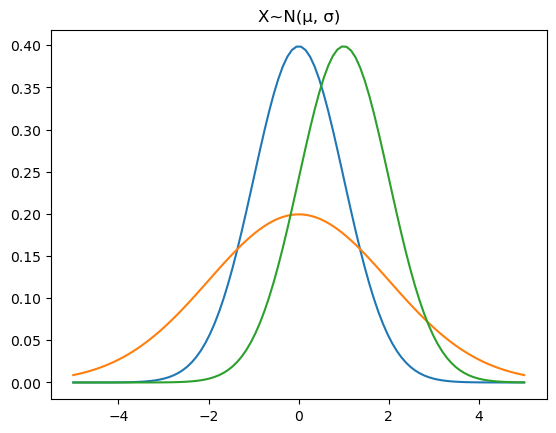

In [85]:
# 이산형 -> pmf / 연속형 -> pdf() -> 확률질량함수 구하기 
x_set = np.linspace(-5,5,100)
for mu, sigma in [(0,1),(0,2),(1,1)]:
    rv = stats.norm(mu, sigma)
    fx = rv.pdf(x_set)
    plt.plot(x_set, fx, label=f'μ={mu}, σ={sigma}')
plt.title('X~N(μ, σ)')
plt.show()

표준정규분포 Z~N(0,1)

$ Z = { {x - \mu} \over \sigma }$

문제. 어느 과목의 시험을 더 잘본 것인가?

어느 학생이 수학은 80점, 영어는 85점을 받았다고 할 때, 어느 과목을 더 잘봤다고 할 수 있을까?

|과목|분포|표준화|환산점수|
|---|---|---|---:|
|수학|$N(60, 10^2)$| Z= (80-60)/10|2|
|영어|$N(80, 5^2)$| Z= (85-80)/5|1|

=> 환산점수가 수학이 더 높아 수학과목을 더 잘봤다고 할 수 있다.

**$ P(-1.5<=Z<=1.5)= $?**

P(Z<=1.5)-P(Z <= -1.5)

In [87]:
norm_rv= stats.norm(0,1)

In [89]:
norm_rv.cdf(1.5), norm_rv.cdf(-1.5)

(0.933, 0.067)

In [90]:
norm_rv.cdf(1.5) -  norm_rv.cdf(-1.5)

0.866

$ P(0<=Z<=k) = 0.4$을 만족하는 k는?

In [94]:
# 0.4를 구하는데 0.9를 넣은 이유는 생성한 정규분포는 norm(0,1)이기 때문에-0.5~0.5라서 0.4는 90%의 해당
norm_rv.ppf(0.9)

1.282

### t분포

- student's t 분포 (Gosset)
- 소표본(n<30) 검정에서 정규분포를 대신해서 활용
- 두 집단의 평균차이 검정, 한 집단의 모평균 추정/검정
- 좌우대칭, 정규분포 보다 가운데 봉우리 조금 낮음, 꼬리부분이 더 두텁다.
- scipy.stats.t(df)
- 자유도(degree of freedom)에 의해 모양이 결정
- 자유가 커질수록 정규분포에 근사

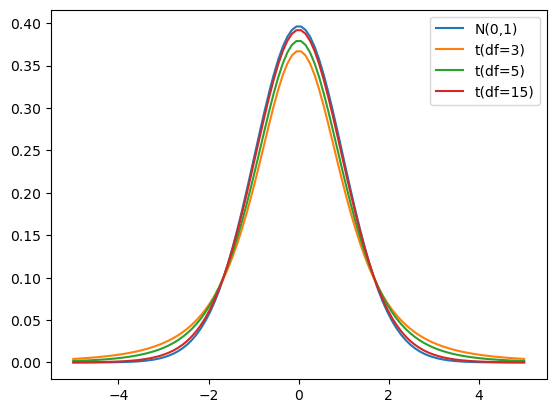

In [97]:
x_set = np.linspace(-5,5,100)
norm_rv = stats.norm(0,1)
norm_fx = rv.pdf(x_set)
plt.plot(x_set, norm_fx, label='N(0,1)')

for df in [3, 5,15]:
    rv = stats.t(df)
    fx = rv.pdf(x_set)
    plt.plot(x_set, fx, label=f't(df={df})')
    
plt.legend()
plt.show()

-----